# Отчет по итогам финальной версии проекта

## Используемые модули

Установим необходимые модули:

In [ ]:
pip install -r requirements.txt

## Продемонстрируем работу алгоритма на тестовых примерах

Импортируем необходимые модули

In [170]:
from pathlib import Path
import pandas as pd
from intelligent_placer_lib.placer import run

Напишем функцию, которая вернет список имен для тестовых изображений  

In [182]:
def get_paths(path):
    paths = []
    p_test = None
    for p_test in path.glob("*.jpg"):
        if p_test != "background.jpg":
            paths.append(p_test)
    return paths

Напишем функцию, которая запустит алгоритм для всех изображений, полученных с помощью функции *get_paths*

1)


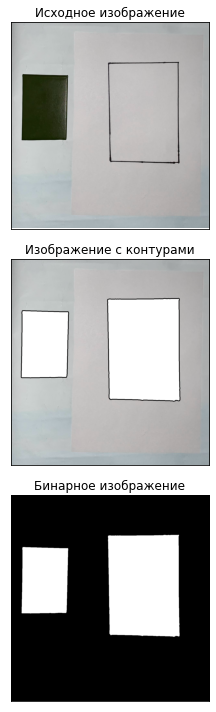

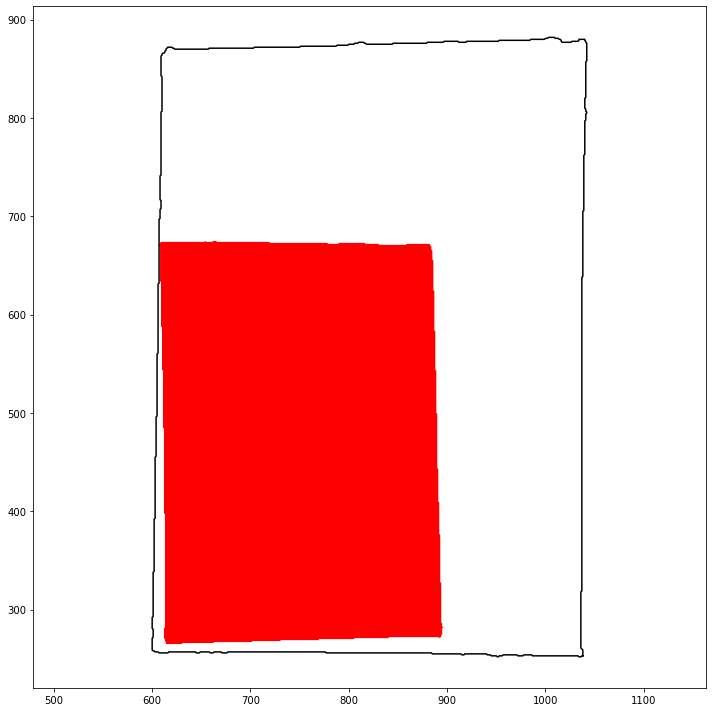

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №1 вмещает в себя предмет
2)


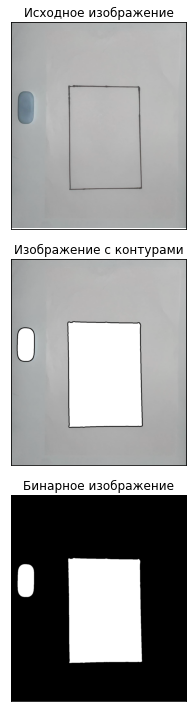

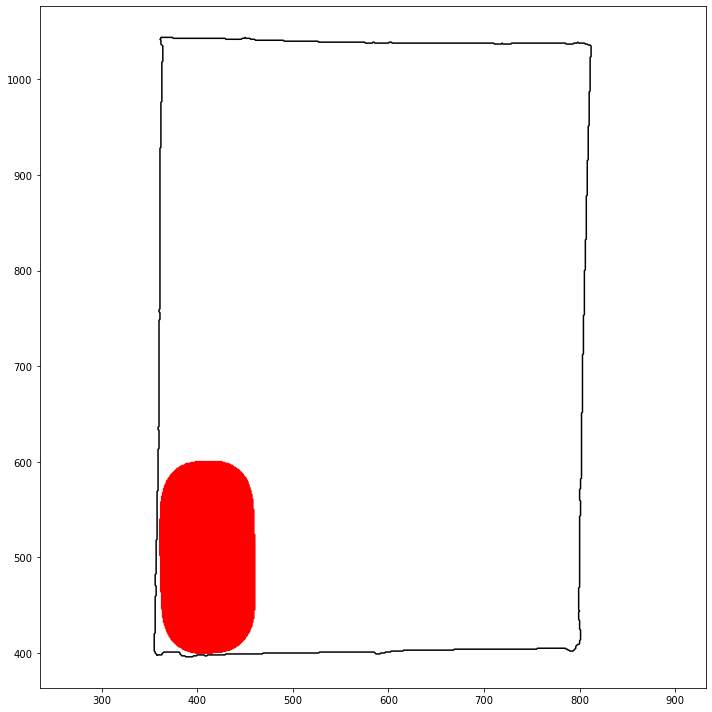

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №2 вмещает в себя предмет
3)


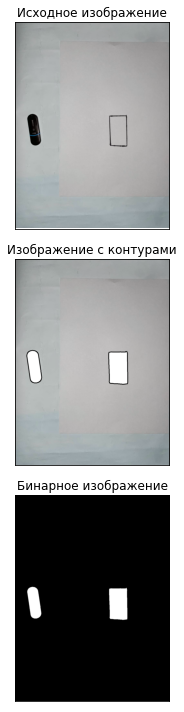

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №3 не вмещает предмет
4)


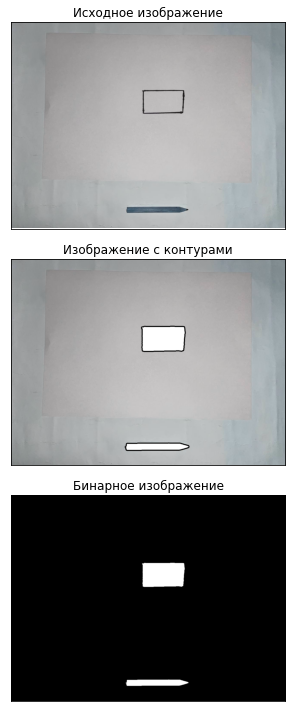

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №4 не вмещает предмет
5)


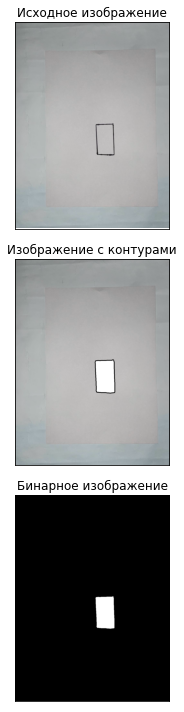

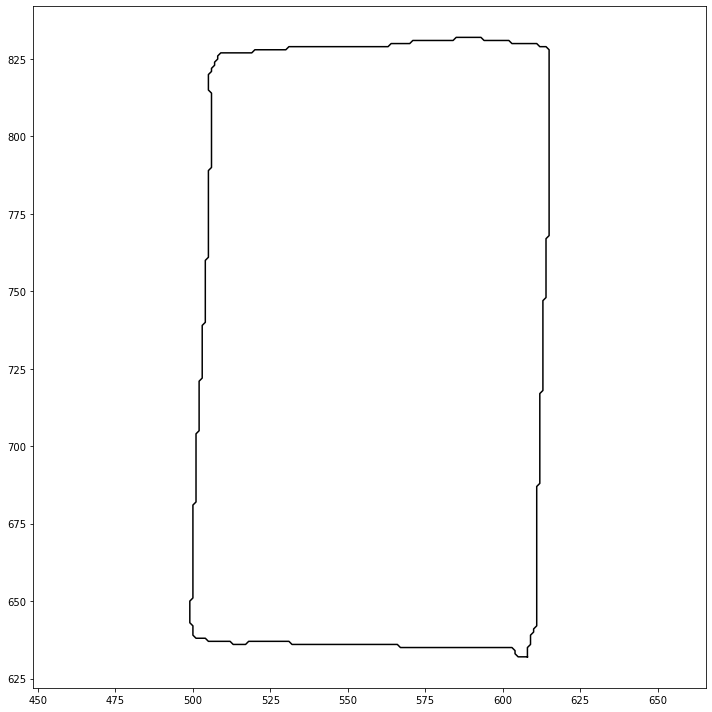

Истинный результат -  False
Полученный результат -  False
Пояснения -  на изображении №5 нет ни одного предмета - нечего помещать в многоугольник
6)


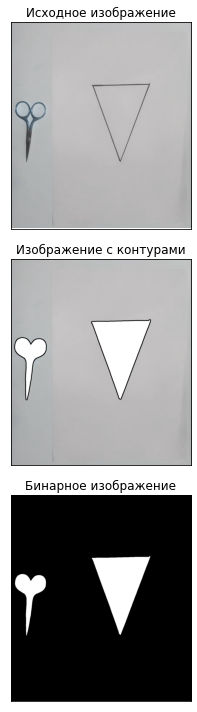

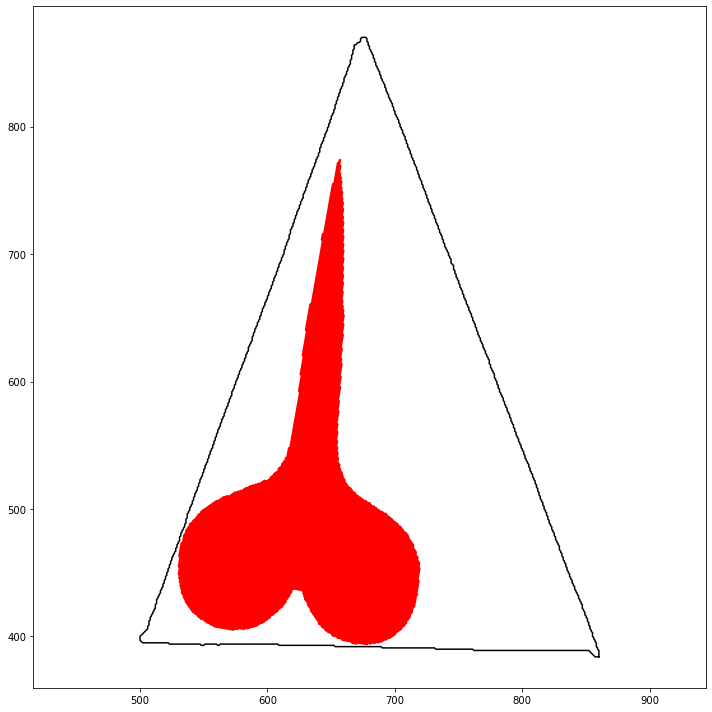

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №6 вмещает в себя предмет
7)


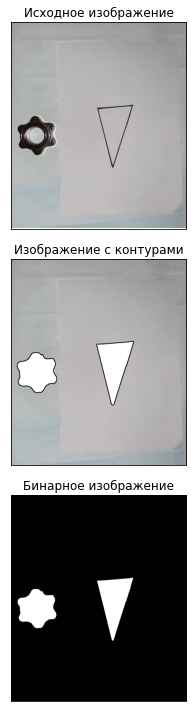

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №7 не вмещает в себя предмет
8)


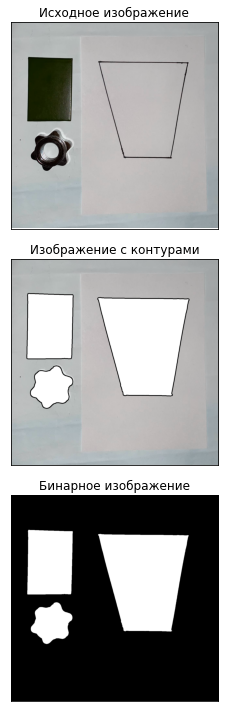

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №8 не вмещает в себя все предметы
9)


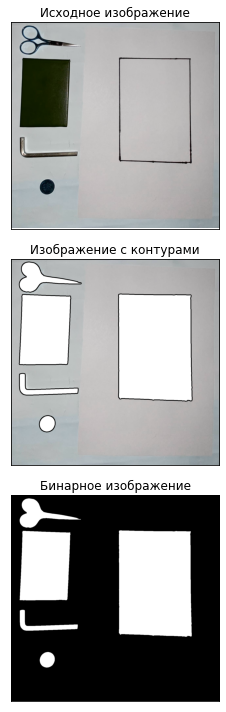

Истинный результат -  True
Полученный результат -  False
Пояснения -  многоугольник на изображении №9 вмещает в себя все предметы
10)


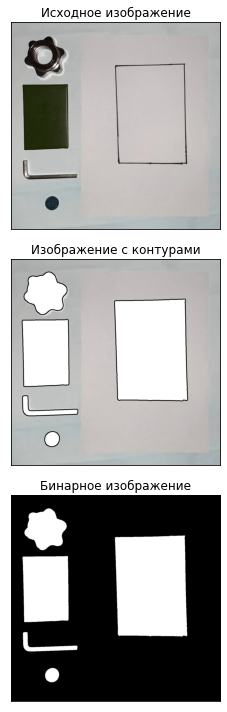

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №10 не вмещает в себя все предметы (только 3 из 4)
11)


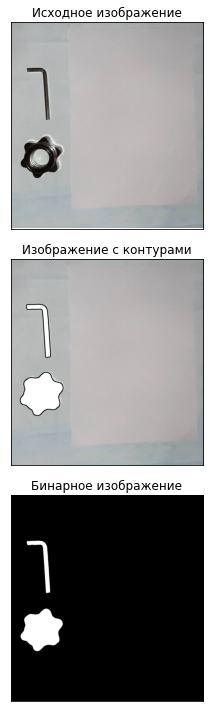

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №11 отсутствует - некуда помещать
12)


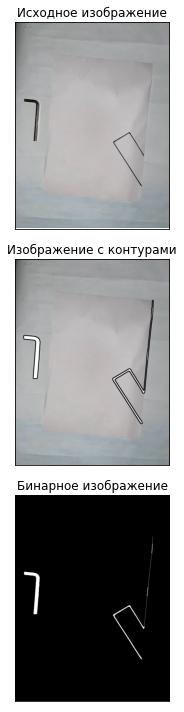

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №12 не замкнут
13)


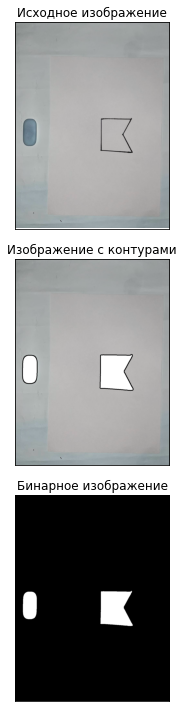

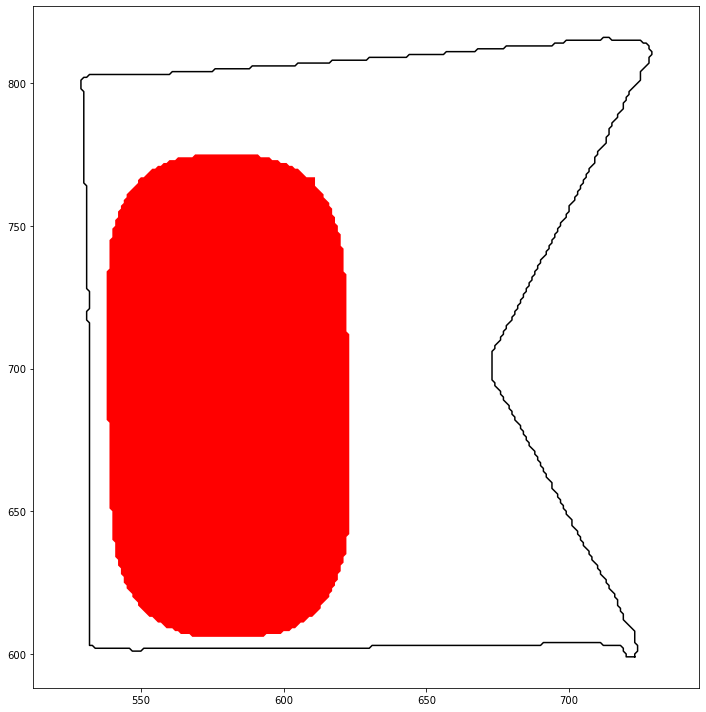

Истинный результат -  True
Полученный результат -  True
Пояснения -  многоугольник на изображении №13 вмещает в себя все предмет (засчитаем невыпуклый многоугольник)
14)


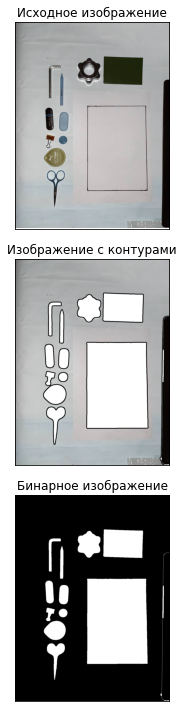

Истинный результат -  True
Полученный результат -  False
Пояснения -  многоугольник на изображении №14 вмещает в себя все предметы
15)


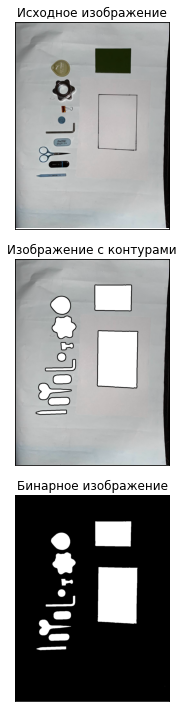

Истинный результат -  False
Полученный результат -  False
Пояснения -  многоугольник на изображении №15 не вмещает в себя все предметы


In [173]:
def demonstration_results(path_tests):
    paths = get_paths(path_tests)
    count = 0
    data = pd.read_csv('Data/test/label.csv', sep=r'\s*,\s*', header=0, engine='python')
    labels = data['label'].tolist()
    descriptions = data['description'].tolist()
    label = [str(label) for label in labels]
    description = [text for text in descriptions]
    results = []
    for p in paths:
        print(str(count + 1) + ")")
        result = run(str(p))
        print("Истинный результат - ", label[count])
        print("Полученный результат - ", result)
        print("Пояснения - ", description[count])
        results.append(result)
        count = count + 1
    return results, labels


path_tests = Path("Data/test")
results, labels = demonstration_results(path_tests)

# Accuracy Metric

### Рассчитывается как отношение количества правильных прогнозов к их общему количеству

Находим число правильных прогнозов:

In [177]:
# счетчик для числа правильных прогнозов
result = 0 

for i in range(len(results)):
    if str(results_[i]).casefold() == label[i].casefold():
        result = result + 1

Считаем accuracy:

In [178]:
accuracy = result / len(labels)

Выведем полученную точность:

In [179]:
accuracy

0.8666666666666667

# Итоги работы алгоритма

Таким образом, **была достигнута точность в 86.6%** на тестах.  
Результат можно улучшить изменив угол поворота и размер смещения, дополнив проверкой многоугольника на выпуклость, а также уточнением при работе с большим числом предметов, но это плохо скажется на производительности алгоритма